In [378]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [379]:
user=".flerin"
password="!!!"
query = '''select * from uat_ca.mc_base_td'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    td = pd.read_sql(query, connect)
td.head()

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17036\3218189405.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  td = pd.read_sql(query, connect)


,report_month,report_date,cluster_name,macroregion,region,branch_id,cust_id,subs_id,msisdn,point_name,...,lt_gr,age,age_gr,gender,tp_id,tp_name,tp_short,concept,subs_flg,msk_flg
0,2022-11-01,2022-11-01,Challenger Elite,Байкал и Дальний Восток,Бурятия,66.0,1.000721e+11,1.000719e+11,79516315905,NPS TD,...,13-24,39.0,36-45,Ж,10017350.0,Компаньон S,Компаньон S,Other,1,0
1,2020-03-01,2020-03-01,Challenger,Байкал и Дальний Восток,Владивосток,68.0,1.000683e+11,1.000682e+11,79940040466,NPS TD,...,3,28.0,21-35,М,10016095.0,Безлимит 615,Безлимит 615,Безлимит,1,0
2,2022-12-01,2022-12-01,Challenger Elite,Урал,Тюмень,50.0,1.000427e+11,1.000432e+11,79504913786,NPS TD,...,25+,40.0,36-45,Ж,10016621.0,Мой онлайн 12_2022 (Тюмень NEW),Мой онлайн,Конструктор 12_2022,1,0
3,2023-04-01,2023-04-18,Challenger,Северо-Запад,С.Петербург,8.0,1.519872e+07,1.524015e+07,79516888808,NPS TD,...,25+,38.0,36-45,М,20017290.0,Мой онлайн+ 12_2022 (Санкт-Петербург),Мой онлайн+,Конструктор 12_2022,1,0
4,2020-06-01,2020-06-01,Challenger Elite,Урал,ХМАО,100.0,1.000406e+11,1.000409e+11,79505016012,NPS TD,...,25+,36.0,36-45,М,10015315.0,Мой онлайн+ 12_2019 (Ханты-Мансийск NEW),Мой онлайн+,Конструктор 12_2019,1,0


In [380]:

query_2 = '''select * from uat_ca.v3_nps_main_td'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    td_o= pd.read_sql(query_2, connect)
td_o.head()

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17036\1011356955.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  td_o= pd.read_sql(query_2, connect)


,create_month,week_num,first_day_week,create_date,cluster_name,macroregion,region,branch_id,subs_id,msisdn,...,nps_category,nps_key,mark_2,mark_3,mark_4,mark_5,mark_6,mark_7,ans_2,ans_5
0,2023-03-01,13,2023-03-27,2023-03-29,Challenger Elite,Черноземье,Белгород,34.0,4.612818e+07,79040894289,...,Detractor,-1,4 5,None,None,None,None,"Старый Оскол Жукова 41, сеть ловит только в од...",Другое,None
1,2022-03-01,12,2022-03-21,2022-03-25,Challenger Elite,Черноземье,Белгород,34.0,5.771439e+07,79507122773,...,Promoter,1,None,None,None,None,None,None,None,None
2,2022-05-01,20,2022-05-16,2022-05-20,Defender,Центр,Тула,26.0,2.000295e+11,79539532660,...,Detractor,-1,"1,2,4,5",None,None,None,None,Тульская область ТеплоОгаревский район с. Волч...,Другое,None
3,2022-10-01,41,2022-10-10,2022-10-10,Challenger,Северо-Запад,Петрозаводск,33.0,2.000288e+11,79535262931,...,Detractor,-1,"1,2,3",None,None,None,None,"Ул. Ломоносова, Древлянка,а также в другом рег...",Другое,None
4,2022-12-01,51,2022-12-19,2022-12-23,Defender,Сибирь,Кемерово,2.0,1.493115e+07,79511820697,...,Detractor,-1,None,None,None,None,None,None,Личный кабинет - Мой Tele2,None



Проверка на стационарность: Проверьте оба временных ряда на стационарность. Стационарный временной ряд имеет постоянное среднее значение и стандартное отклонение в течение времени, поэтому он может быть более предсказуемым. Если один или оба ряда не стационарны, рекомендуется применить соответствующие методы преобразования.

Проверка на корреляцию: Определить насколько сильно коррелируют два временных ряда. Это можно сделать, выполнив анализ корреляции, такой как коррелограмма и/или ковариационная матрица. Если два ряда сильно коррелируют, то имеет смысл использовать дополнительный ряд для прогнозирования.

Выбор подходящей модели: Выберите подходящие модели прогнозирования на основе особенностей временных рядов. Некоторые из распространенных моделей прогнозирования временных рядов включают ARIMA (авторегрессионная интегрированная средняя), экспоненциальное сглаживание и нейронные сети.

Обучение модели: Составьте обучающий набор данных, используя один временной ряд как тестовый набор и другой в качестве обучающего набора. Используйте этот набор для настройки параметров модели и обучения предсказательной модели.

Проверка модели: Оцените результаты модели прогнозирования по сравнению с независимой выборкой данных. Используйте метрики оценки качества модели, такие как средняя абсолютная ошибка (MAE), среднеквадратичная ошибка (MSE) и коэффициент детерминации (R²).

Использование модели для прогнозирования: Используйте обученную модель для прогнозирования будущих значений одного временного ряда на основе другого.

#Анализ особенностей временных рядов: тренды, сезонности, циклы, выбросы и т. д. 




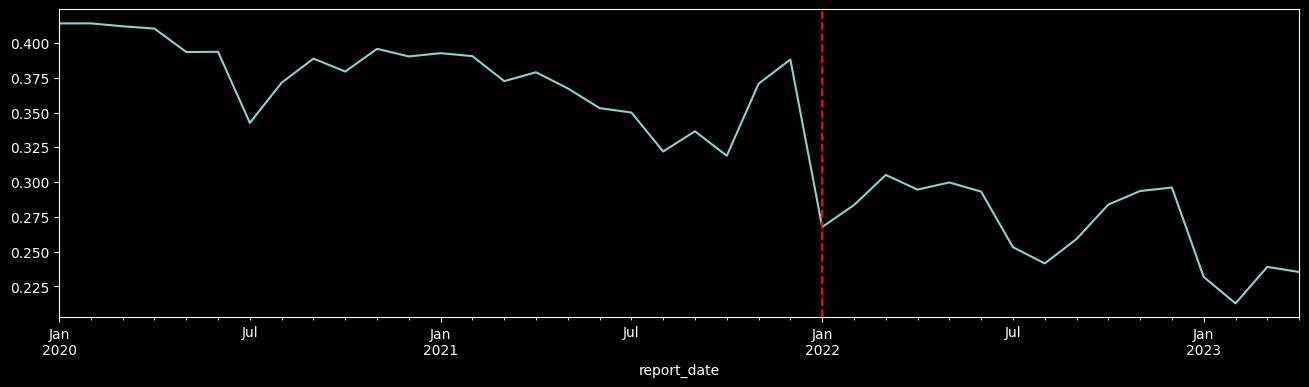

In [381]:
#рыночный ТД, NPS за весь период 
fig = plt.subplots(figsize=(16,4))
td.report_date    = pd.to_datetime(td.report_date)
td.groupby(pd.Grouper(key='report_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"}).nps_key.plot()
# вставляем вертикальную линию на дату 'YYYY-MM-DD'
plt.axvline(x='2022-01-01', color='r', linestyle='--')

вырезаем предыдущие периоды

<Axes: xlabel='report_date'>

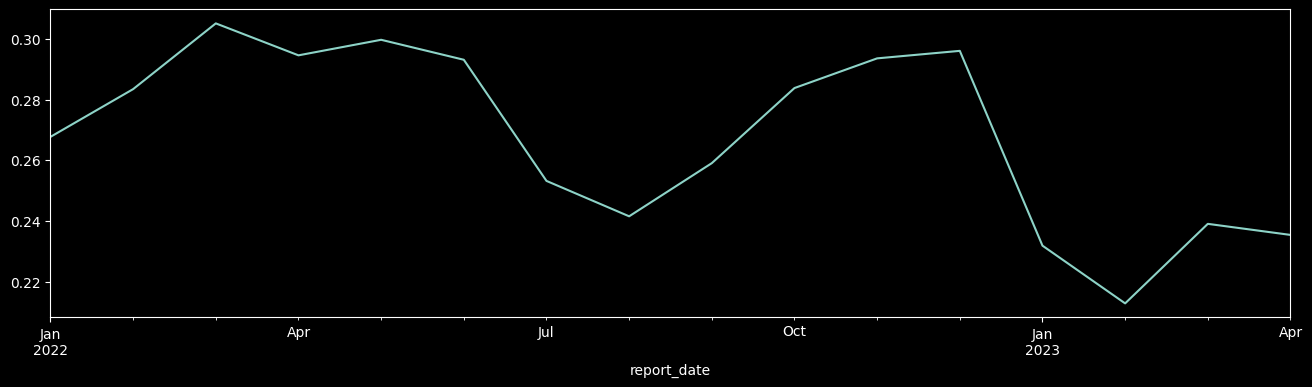

In [382]:

fig = plt.subplots(figsize=(16,4))
t= td.query("report_date >= '2022-01-01'").groupby(pd.Grouper(key='report_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"})
t.nps_key.plot()

сравниваем группы по возрасту

In [383]:
t = td.query("report_date >= '2022-01-01'").groupby(['age_gr'], as_index=False).agg({'nps_key' : ['mean', 'count']})
t

age_gr   nps_key       
              mean  count
0  16-20  0.327273    825
1  21-35  0.245503  18069
2  36-45  0.285028  22689
3  46-55  0.301241  15788
4   56 +  0.259966   2985
5    n/a  0.111625   3458

In [384]:
td_o.groupby(['age_gr'], as_index = False).agg({'nps_key' : ['mean', 'count']})

age_gr   nps_key       
              mean  count
0  16-20  0.235123    689
1  21-35  0.097563  13212
2  36-45  0.292957  18402
3  46-55  0.412897  14081
4   56 +  0.615061  19042
5    n/a  0.322751    378

рисуем график для нашего ТД

<Axes: xlabel='create_date'>

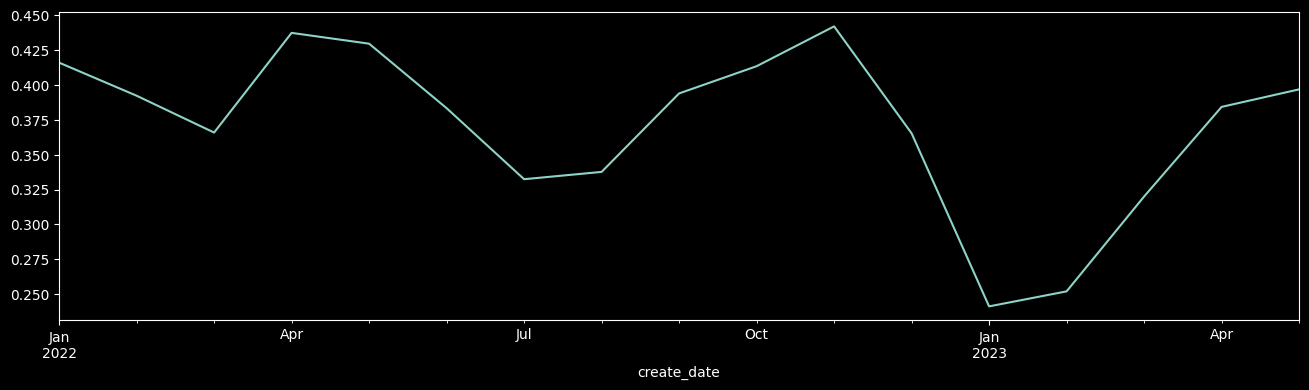

In [385]:
fig = plt.subplots(figsize=(16,4))
td_o.create_date = pd.to_datetime(td_o.create_date)

t_o = td_o.groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"})
t_o.nps_key.plot()

сравниваем тренды

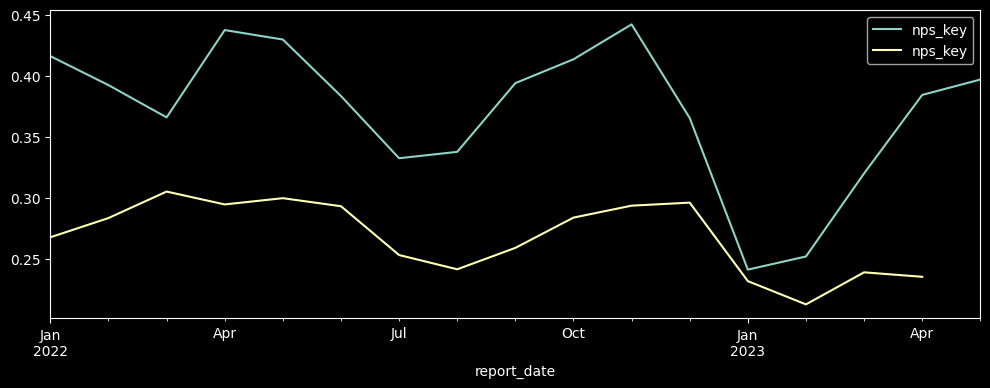

In [386]:

# создаем объект ax
fig, ax = plt.subplots(figsize = (12, 4))
# запросы
t_o = td_o.groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"})
t = td.query("report_date >= '2022-01-01'").groupby(pd.Grouper(key='report_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"})
# отрисовка графиков на одном объекте ax
t_o_plot = t_o.nps_key.plot(ax=ax)
t_plot = t.nps_key.plot(ax=ax)
# добавляем легенду к графикам
t_o_plot.legend(['Наш TD'])
t_plot.legend(['TD'])
ax.legend()
# вывод графика
plt.show()

сравниваем тренды наш тд и тд без 56+ 




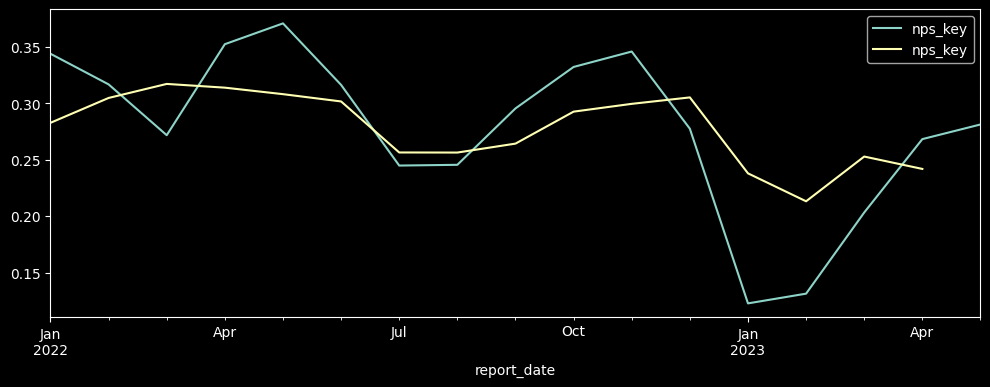

In [387]:
# создаем объект ax
fig, ax = plt.subplots(figsize = (12, 4))
# запросы
t_o = td_o.query("age_gr != 'n/a' and age_gr != '56 +'").groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"})
t = td.query("report_date >= '2022-01-01'  and age_gr != 'n/a' and age_gr != '56 +' ").groupby(pd.Grouper(key='report_date', freq='M')).agg({"subs_id": "count",  "nps_key": "mean"})
# отрисовка графиков на одном объекте ax
t_o_plot = t_o.nps_key.plot(ax=ax)
t_plot = t.nps_key.plot(ax=ax)
# добавляем легенду к графикам
t_o_plot.legend(['Наш TD'])
t_plot.legend(['TD'])
ax.legend()
# вывод графика
plt.show()

наш тд по группам

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17036\864420160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_filtered.create_date = pd.to_datetime(td_filtered.create_date)


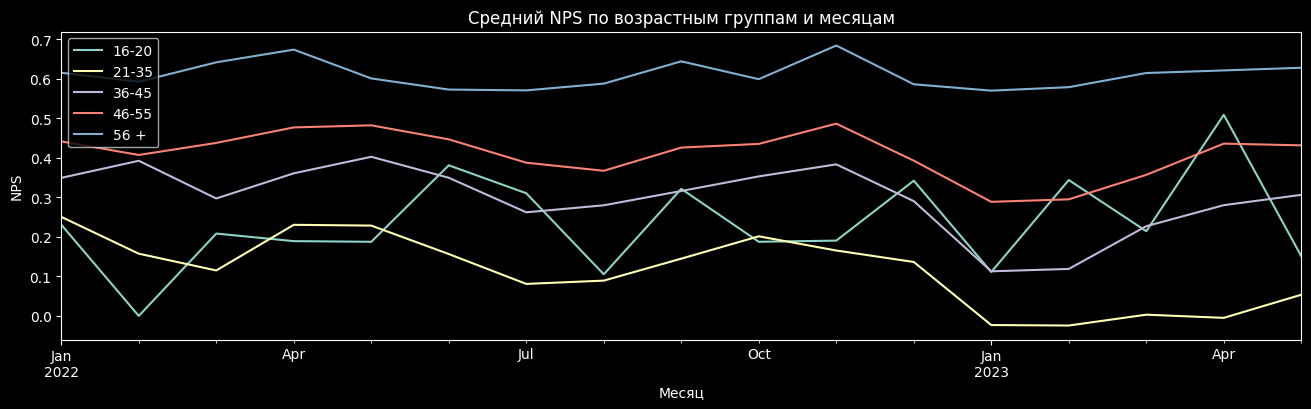

In [388]:
td_filtered = td_o.query("age_gr != 'n/a'")

fig, ax = plt.subplots(figsize=(16,4))

td_filtered.create_date = pd.to_datetime(td_filtered.create_date)
t_o = td_filtered.groupby([pd.Grouper(key='create_date', freq='M'), 'age_gr']).agg({"subs_id": "count",  "nps_key": "mean"})
t_o.unstack()['nps_key'].plot(ax=ax)

ax.set_xlabel('Месяц')
ax.set_ylabel('NPS')
ax.set_title('Средний NPS по возрастным группам и месяцам')
ax.legend(loc='upper left') # перемещаем легенду в правый верхний угол

plt.show()


тд по группам 

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17036\2852440409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_filtered.report_date = pd.to_datetime(td_filtered.report_date)


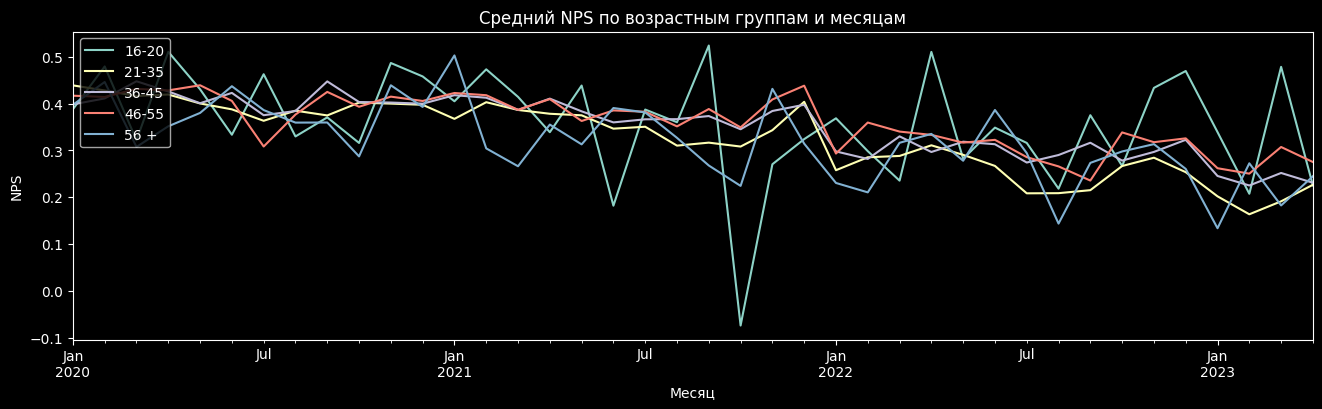

In [389]:
td_filtered = td.query("age_gr != 'n/a'")

fig, ax = plt.subplots(figsize=(16,4))

td_filtered.report_date = pd.to_datetime(td_filtered.report_date)
t_o = td_filtered.groupby([pd.Grouper(key='report_date', freq='M'), 'age_gr']).agg({"subs_id": "count",  "nps_key": "mean"})
t_o.unstack()['nps_key'].plot(ax=ax)

ax.set_xlabel('Месяц')
ax.set_ylabel('NPS')
ax.set_title('Средний NPS по возрастным группам и месяцам')
ax.legend(loc='upper left') # перемещаем легенду в правый верхний угол

plt.show()

In [390]:
tdc= td.copy()

Прогноз ТД без фильтра на 56+

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


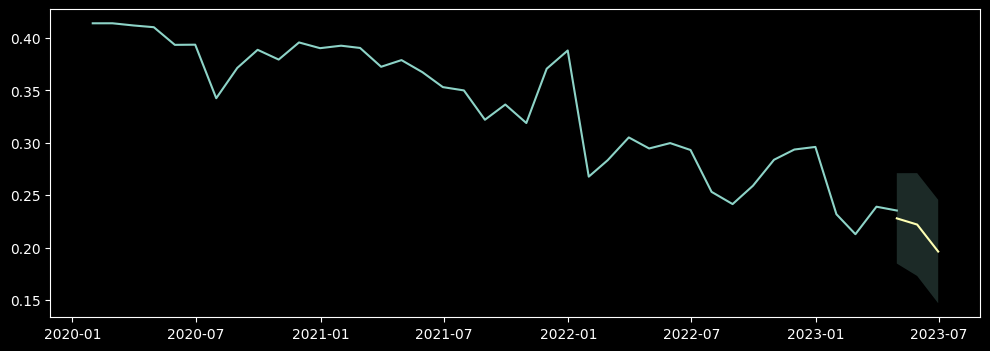

In [391]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

fig, ax = plt.subplots(figsize = (12, 4))
nps = td.groupby(pd.Grouper(key='report_date', freq='M'))['nps_key'].mean()
# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Генерация 3 месяцев вперед от последней даты
last_date = nps.index[-1]
forecast_dates = [last_date + DateOffset(months=x) for x in range(0, 3)]

# Прогнозирование NPS на 3 месяца вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=3)
forecast_ci = model_fit.get_forecast(steps=3).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)

# Визуализация результатов прогнозирования и доверительного интервала
plt.plot(nps.index, nps.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.show()

In [392]:
forecast_nps_df

,nps_forecast,lower_ci,upper_ci
date,,,
2023-04-30,0.227940,0.184837,0.271043
2023-05-30,0.222032,0.172973,0.271092
2023-06-30,0.196285,0.146937,0.245632


Прогноз TD с фильтром на 56+

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


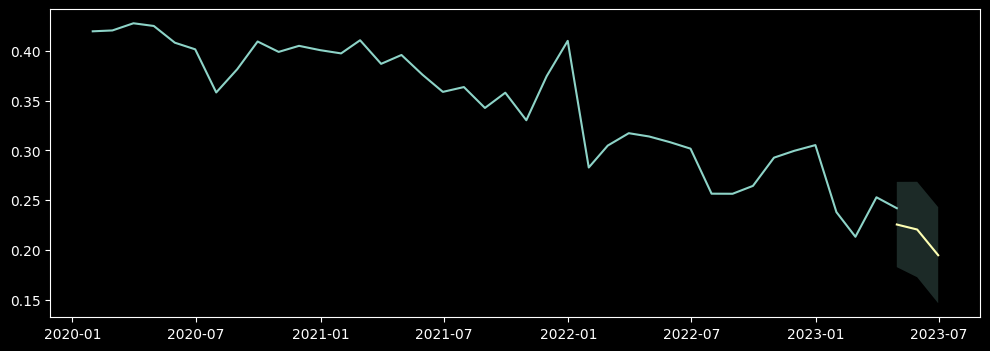

In [393]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

fig, ax = plt.subplots(figsize = (12, 4))

nps = td.query("age_gr != 'n/a' and age_gr != '56 +' ").groupby(pd.Grouper(key='report_date', freq='M'))['nps_key'].mean()
# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Генерация 3 месяцев вперед от последней даты
last_date = nps.index[-1]
forecast_dates = [last_date + DateOffset(months=x) for x in range(0, 3)]

# Прогнозирование NPS на 3 месяца вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=3)
forecast_ci = model_fit.get_forecast(steps=3).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)

# Визуализация результатов прогнозирования и доверительного интервала
plt.plot(nps.index, nps.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.show()

In [394]:
forecast_nps_df

,nps_forecast,lower_ci,upper_ci
date,,,
2023-04-30,0.225517,0.182652,0.268383
2023-05-30,0.220485,0.172504,0.268466
2023-06-30,0.194649,0.146335,0.242962


Прогноз ТД + 56 фильтр недельные данные

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17036\2244769546.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  td.reportdate = pd.to_datetime(td.report_date)
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


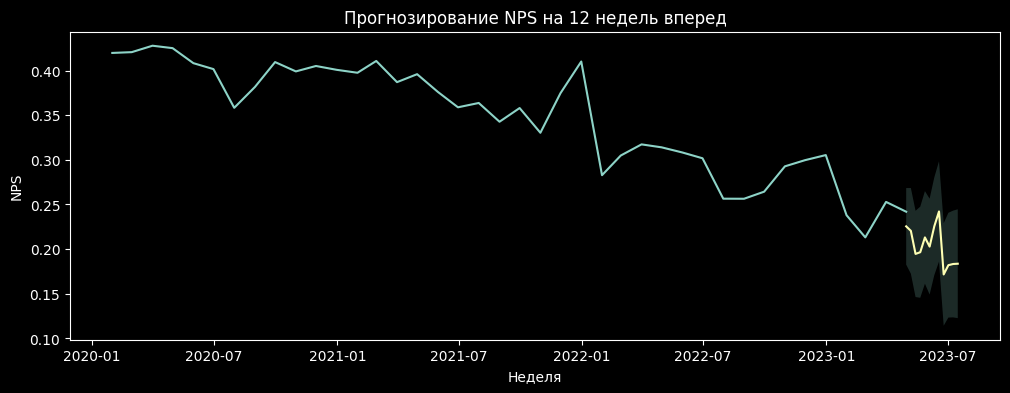

In [395]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset
fig, ax = plt.subplots(figsize = (12, 4))
td.reportdate = pd.to_datetime(td.report_date)
nps = td.query("age_gr != 'n/a' and age_gr != '56 +' ").groupby(pd.Grouper(key='report_date', freq='M'))['nps_key'].mean()
# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
# Генерация 12 недель вперед от последней даты
last_date = nps.index[-1]
forecast_dates = [last_date + DateOffset(weeks=x) for x in range(0, 12)]
# Прогнозирование NPS на 12 недель вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=12)
forecast_ci = model_fit.get_forecast(steps=12).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)
# Визуализация результатов прогнозирования и доверительного интервала
plt.plot(nps.index, nps.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.xlabel('Неделя')
plt.ylabel('NPS')
plt.title('Прогнозирование NPS на 12 недель вперед')
plt.show()


In [396]:
forecast_nps_by_month = pd.DataFrame(forecast_nps_df.resample('M').mean())
forecast_nps_by_month

,nps_forecast,lower_ci,upper_ci
date,,,
2023-04-30,0.225517,0.182652,0.268383
2023-05-31,0.206202,0.156415,0.255989
2023-06-30,0.210583,0.155066,0.266100
2023-07-31,0.183020,0.123228,0.242812


In [397]:
nps_forec_now  = pd.concat([nps, forecast_nps_by_month])
nps_forec_now

,0,nps_forecast,lower_ci,upper_ci
2020-01-31,0.419725,NaN,NaN,NaN
2020-02-29,0.420599,NaN,NaN,NaN
2020-03-31,0.427800,NaN,NaN,NaN
2020-04-30,0.425089,NaN,NaN,NaN
2020-05-31,0.408273,NaN,NaN,NaN
2020-06-30,0.401612,NaN,NaN,NaN
2020-07-31,0.358267,NaN,NaN,NaN
2020-08-31,0.381688,NaN,NaN,NaN
2020-09-30,0.409481,NaN,NaN,NaN
2020-10-31,0.399033,NaN,NaN,NaN


Прогноз ТД наш

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


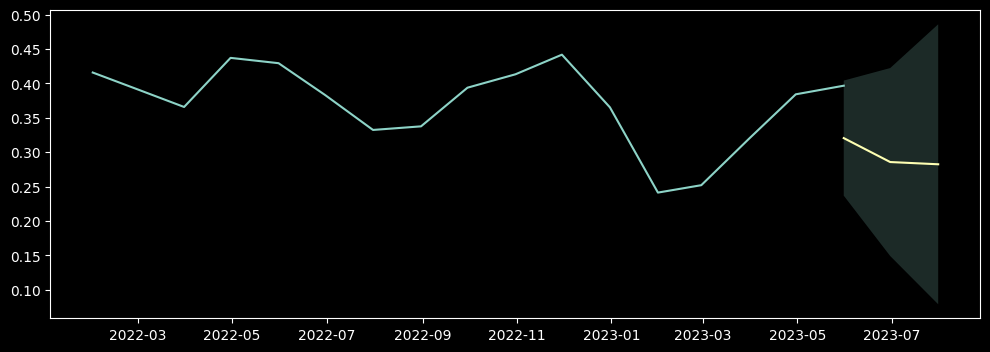

In [398]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset
td_o.create_date = pd.to_datetime(td_o.create_date)
fig, ax = plt.subplots(figsize = (12, 4))
nps = td_o.groupby(pd.Grouper(key='create_date', freq='M'))['nps_key'].mean()
# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Генерация 3 месяцев вперед от последней даты
last_date = nps.index[-1]
forecast_dates = [last_date + DateOffset(months=x) for x in range(0, 3)]

# Прогнозирование NPS на 3 месяца вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=3)
forecast_ci = model_fit.get_forecast(steps=3).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)

# Визуализация результатов прогнозирования и доверительного интервала
plt.plot(nps.index, nps.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.show()

In [399]:
forecast_nps_df

,nps_forecast,lower_ci,upper_ci
date,,,
2023-05-31,0.320546,0.236839,0.404252
2023-06-30,0.285723,0.149008,0.422438
2023-07-31,0.282465,0.078799,0.486130


Прогноз ТД наш + 56 фильтр

upd (особой разницы нет)

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


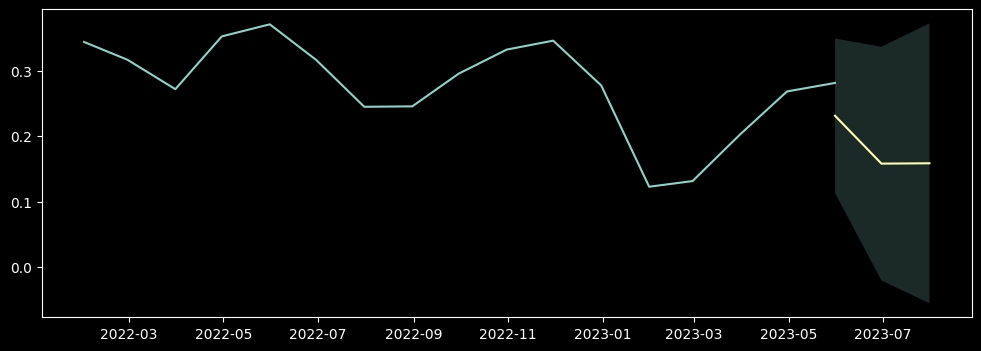

In [400]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset
td_o.create_date = pd.to_datetime(td_o.create_date)
fig, ax = plt.subplots(figsize = (12, 4))
nps = td_o.query("age_gr != 'n/a' and age_gr != '56 +'").groupby(pd.Grouper(key='create_date', freq='M'))['nps_key'].mean()
# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Генерация 3 месяцев вперед от последней даты
last_date = nps.index[-1]
forecast_dates = [last_date + DateOffset(months=x) for x in range(0, 3)]

# Прогнозирование NPS на 3 месяца вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=3)
forecast_ci = model_fit.get_forecast(steps=3).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)

# Визуализация результатов прогнозирования и доверительного интервала
plt.plot(nps.index, nps.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.show()

In [401]:
forecast_nps_df

,nps_forecast,lower_ci,upper_ci
date,,,
2023-05-31,0.231191,0.113039,0.349343
2023-06-30,0.157932,-0.020843,0.336706
2023-07-31,0.158485,-0.055643,0.372612


Прогноз нашего ТД на недельных данных + фильтр 56+

upd (лучше, чем месяц)

In [402]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

td_filtered.create_date = pd.to_datetime(td_filtered.create_date)

nps_weekly = td_filtered.query("age_gr != 'n/a' and age_gr != '56 +'").groupby(pd.Grouper(key='create_date', freq='W'))['nps_key'].mean()

# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps_weekly, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Генерация 12 недель вперед от последней даты
last_date = nps_weekly.index[-1]
forecast_dates = [last_date + DateOffset(weeks=x) for x in range(0, 12)]

# Прогнозирование NPS на 12 недель вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=12)
forecast_ci = model_fit.get_forecast(steps=12).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)

# Визуализация результатов прогнозирования и доверительного интервала
plt.figure(figsize=(12, 4))
plt.plot(nps_weekly.index, nps_weekly.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.xlabel('Неделя')
plt.ylabel('NPS')
plt.title('Прогнозирование NPS на 12 недель вперед')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'create_date'

In [ ]:
forecast_nps_df
#forecast_nps_df['month'] = forecast_nps_df.index.month
#forecast_nps_df.groupby('month')['nps_forecast'].mean()


,nps_forecast,lower_ci,upper_ci
date,,,
2023-06-04,0.275219,0.128425,0.422013
2023-06-11,0.280095,0.060231,0.499959
2023-06-18,0.267118,-0.009744,0.543981
2023-06-25,0.214818,-0.104358,0.533994
2023-07-02,0.196812,-0.161854,0.555478
2023-07-09,0.253698,-0.140939,0.648335
2023-07-16,0.236963,-0.189861,0.663787
2023-07-23,0.213872,-0.243236,0.670979
2023-07-30,0.220677,-0.264913,0.706267


date
2023-06-30    0.259313
2023-07-31    0.224404
2023-08-31    0.220982
Freq: M, Name: nps_forecast, dtype: float64

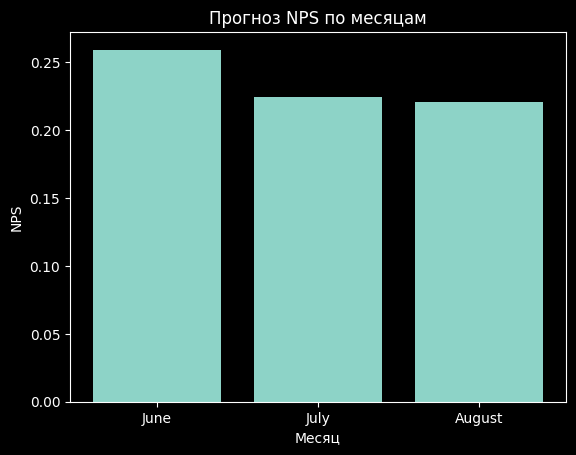

In [ ]:
forecast_nps_by_month = forecast_nps_df.resample('M')['nps_forecast'].mean() # агрегация по месяцу
display(forecast_nps_by_month)
plt.bar(forecast_nps_by_month.index.month_name(), forecast_nps_by_month.values)
plt.xlabel('Месяц')
plt.ylabel('NPS')
plt.title('Прогноз NPS по месяцам')
plt.show()

Прогноз наш TD подневно + 56 фильтр

upd(достаточно неплохо для короткого промежутка времени)

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17036\2497493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_filtered.create_date = pd.to_datetime(td_filtered.create_date)


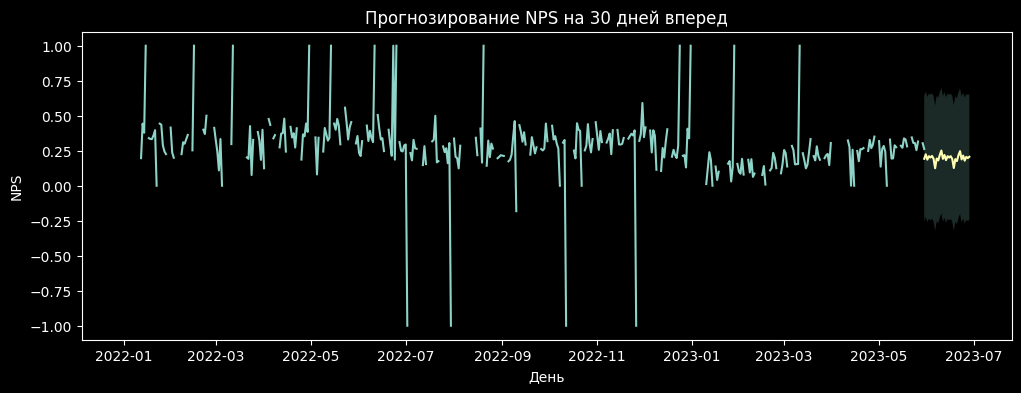

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

td_filtered.create_date = pd.to_datetime(td_filtered.create_date)

nps_daily = td_filtered.query("age_gr != 'n/a' and age_gr != '56 +'").groupby(pd.Grouper(key='create_date', freq='D'))['nps_key'].mean()

# Создание модели SARIMAX с учетом сезонности
model = SARIMAX(nps_daily, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Генерация 30 дней вперед от последней даты
last_date = nps_daily.index[-1]
forecast_dates = [last_date + DateOffset(days=x) for x in range(0, 30)]

# Прогнозирование NPS на 30 дней вперед с доверительным интервалом 95%
forecast = model_fit.forecast(steps=30)
forecast_ci = model_fit.get_forecast(steps=30).conf_int()

# Создание DataFrame из результатов прогнозирования и дат
forecast_nps_df = pd.DataFrame({'date': forecast_dates, 'nps_forecast': forecast, 
                                'lower_ci': forecast_ci.iloc[:,0], 'upper_ci': forecast_ci.iloc[:,1]})
forecast_nps_df.set_index('date', inplace=True)

# Визуализация результатов прогнозирования и доверительного интервала
plt.figure(figsize=(12, 4))
plt.plot(nps_daily.index, nps_daily.values)
plt.plot(forecast_nps_df.index, forecast_nps_df['nps_forecast'])
plt.fill_between(forecast_nps_df.index, forecast_nps_df['lower_ci'], forecast_nps_df['upper_ci'], alpha=.2)
plt.xlabel('День')
plt.ylabel('NPS')
plt.title('Прогнозирование NPS на 30 дней вперед')
plt.show()

date
2023-05-31    0.208396
2023-06-30    0.197596
Freq: M, Name: nps_forecast, dtype: float64

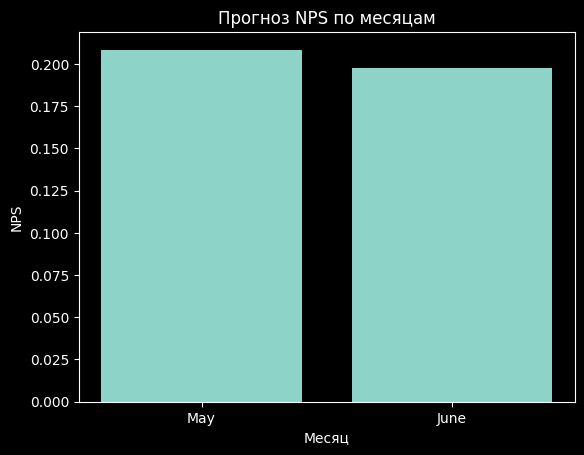

In [ ]:
forecast_nps_by_month = forecast_nps_df.resample('M')['nps_forecast'].mean() # агрегация по месяцу
display(forecast_nps_by_month)
plt.bar(forecast_nps_by_month.index.month_name(), forecast_nps_by_month.values)
plt.xlabel('Месяц')
plt.ylabel('NPS')
plt.title('Прогноз NPS по месяцам')
plt.show()

модель прогноза  одного от другого

In [564]:
# Шаг 1: загрузка данных
t_td = pd.DataFrame(td.query("age_gr != 'n/a' and age_gr != '56 +'")[['report_date','nps_key']].groupby(pd.Grouper(key='report_date', freq='W'))['nps_key'].mean())
t_td_o = pd.DataFrame(td_o.query("age_gr != 'n/a' and age_gr != '56 +'")[['create_date','nps_key']].groupby(pd.Grouper(key='create_date', freq='W'))['nps_key'].mean())

combined_data = pd.merge(t_td, t_td_o, how='outer', left_index=True, right_index=True)
combined_data.columns = ['nps_key_td', 'nps_key_td_o']

# Шаг 2: обработка данных
combined_data.dropna(inplace=True)  # очистим данные от недостающих значений

# Шаг 3: разделение данных на обучающую и тестовую выборки
train_size = int(len(combined_data) * 0.8)  # размер обучающей выборки = 80%

train_data = combined_data.iloc[:train_size]  # данные для обучения
test_data = combined_data.iloc[train_size:]  # данные для тестирования

# Шаг 4: построение модели VAR
from statsmodels.tsa.vector_ar.var_model import VAR

# обучение модели VAR
model = VAR(train_data)
results = model.fit()

# Шаг 5: прогнозирование временных рядов
lag_order = results.k_ar  # количество параметров модели
forecast_input = train_data.values[-lag_order:]  # входные данные для прогнозирования
forecast = results.forecast(y=forecast_input, steps=len(test_data))  # прогнозирование временных рядов

# Шаг 6: оценка качества прогноза
from sklearn.metrics import mean_squared_error

# выделение целевых переменных и признаков
y_test = test_data[['nps_key_td', 'nps_key_td_o']]  # целевая переменная
X_test = test_data[['nps_key_td', 'nps_key_td_o']]  # признаки

# прогнозирование nps_key_td_o от nps_key_td
y_pred_test = results.forecast(X_test.values, len(test_data))[:,1]

# оценка качества прогноза
mse = mean_squared_error(y_test.iloc[:,1], y_pred_test)
print("MSE:", mse)

MSE: 0.0027434728867376107


c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


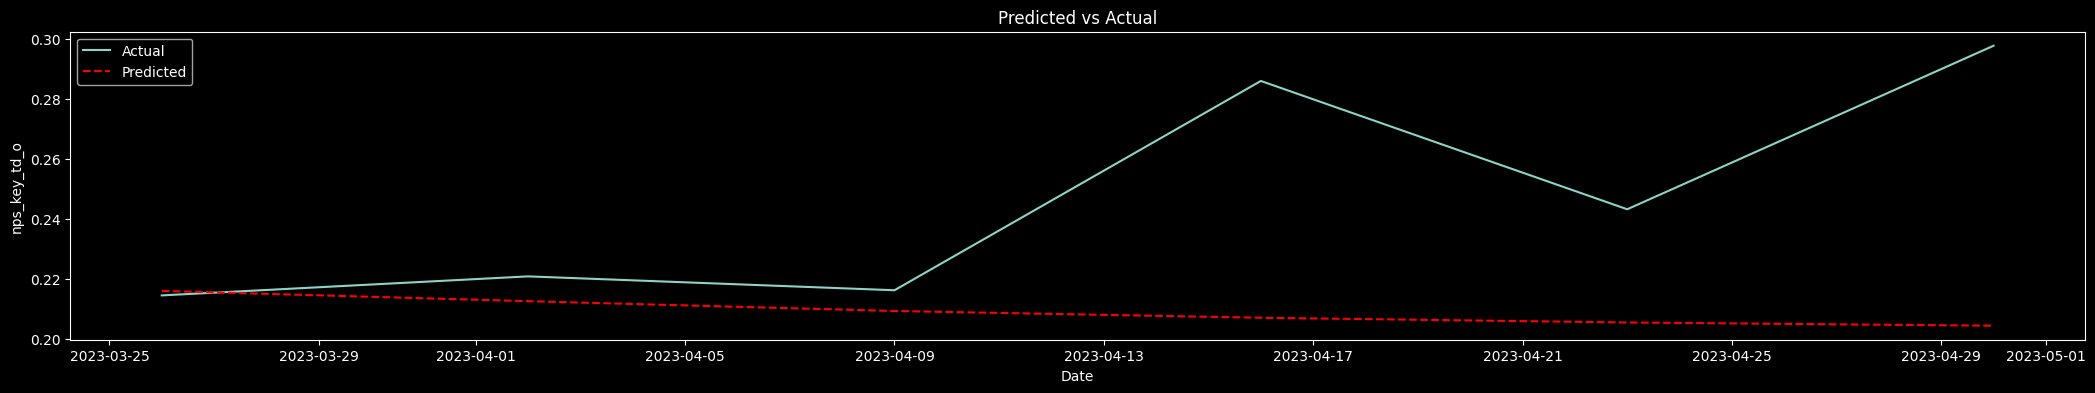

In [572]:
import matplotlib.pyplot as plt

# визуализация прогноза
plt.figure(figsize=(26, 4))
plt.plot(y_test.index, y_test.iloc[:,1], label='Actual')
plt.plot(y_test.index, y_pred_test, linestyle='--', color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('nps_key_td_o')
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

In [ ]:
# не получилось

#Кросс-корреляция (Cross-Correlation) и автокорреляция (Auto-Correlation): 

#Этот метод измеряет степень сходства между двумя временными рядами на разных временных шкалах (например, дни недели или время дня). 

#Кросс-корреляция используется для измерения степени линейной связи между двумя временными рядами, а автокорреляция для измерения степени связи между одним временным рядом и его смещениями на разных временных шкалах.


#Подготовка данных: необходимо импортировать данные для двух временных рядов (td и td_o), проверить их корректность и объединить их в один датафрейм.

t_td = pd.DataFrame(td.query("age_gr != 'n/a' and age_gr != '56 +'")[['report_date','nps_key']].groupby(pd.Grouper(key='report_date', freq='M'))['nps_key'].mean())
t_td_o = pd.DataFrame(td_o.query("age_gr != 'n/a' and age_gr != '56 +'")[['create_date','nps_key']].groupby(pd.Grouper(key='create_date', freq='M'))['nps_key'].mean())

#t_td = t_td.reset_index()
#t_td_o = t_td_o.reset_index()

display(t_td.head(2))
display(t_td_o.head(2))

data = pd.concat([t_td, t_td_o], axis=1)
data = data.dropna()
display(data)
data.plot(figsize=(12,6), subplots=True)
plt.show()


data.columns = ['nps_key_left', 'nps_key_right']
# выбираем столбец 'nps_key' для прогнозирования
nps_target = data['nps_key_left']

# выбираем столбец 'nps_key_right' для использования в качестве фактора
nps_factor = data['nps_key_right']


#Вычисление автокорреляции
#Автокорреляция используется для измерения корреляции между значениями временного ряда и значениями, 
#полученными на малом или большом временном смещении. Для этого можно использовать функцию autocorr из библиотеки pandas.
# Вычисляем автокорреляциюplt.figure(figsize=(10, 5))
plt.plot(nps_target, label='NPS Target')
plt.plot(nps_factor, label='NPS Factor')
plt.title('NPS Time Series')
plt.xlabel('Date')
plt.ylabel('NPS')
plt.legend()
plt.show()



from statsmodels.tsa.stattools import adfuller
result_target = adfuller(nps_target)
print(f"NPS Target ADF Statistic: {result_target[0]:.2f}")
print(f"p-value: {result_target[1]:.2f}")
print("Critical Values:")
for key, value in result_target[4].items():
    print(f"  {key}: {value:.2f}")
print()

result_factor = adfuller(nps_factor)
print(f"NPS Factor ADF Statistic: {result_factor[0]:.2f}")
print(f"p-value: {result_factor[1]:.2f}")
print("Critical Values:")
for key, value in result_factor[4].items():
    print(f"  {key}: {value:.2f}")
print()

# Декомпозиция временных рядов

from statsmodels.tsa.seasonal import seasonal_decompose

result_target = seasonal_decompose(nps_target, model='additive')
result_target.plot()
plt.show()

result_factor = seasonal_decompose(nps_factor, model='additive')
result_factor.plot()
plt.show()



#Рассчитать корреляцию между временными рядами и выбрать задержку для кросс-корреляции:
# Посчитать автокорреляцию и частичную автокорреляцию для целевого и факторного признаков

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plot_acf(nps_target, ax=axs[0, 0], lags=12)
plot_pacf(nps_target, ax=axs[0, 1], lags=12)
plot_acf(nps_factor, ax=axs[1, 0], lags=12)
plot_pacf(nps_factor, ax=axs[1, 1], lags=12)
plt.show()

# Выбрать задержку для кросс-корреляции

corr = nps_target.corr(nps_factor)
print(f'Correlation between NPS Target and NPS Factor: {corr:.2f}')

lags = range(-12, 13)
cross_corr = [nps_target.corr(nps_factor.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 5))
plt.stem(lags, cross_corr, use_line_collection=True)
plt.title('Cross-Correlation Function')
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')
plt.show()

ccf_max_lag = abs(np.argmax(np.abs(cross_corr))) - 12

print(f'Cross-correlation function maximum lag: {ccf_max_lag}')



#Обучить модель и сделать прогноз:
# Обучить модель ARIMA
model = ARIMA(nps_target, order=(2, 1, 0), exog=nps_factor)
model_fit = model.fit(disp=False)
print(model_fit.summary())

# Сделать прогноз

nps_factor_forecast = nps_factor.iloc[-ccf_max_lag:]
nps_target_forecast = model_fit.forecast(steps=ccf_max_lag, exog=nps_factor_forecast.values.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(nps_target, label='NPS Target')
plt.plot(nps_factor, label='NPS Factor')
plt.plot(nps_target_forecast, label='NPS Target Forecast')
plt.title('NPS Time Series')
plt.xlabel('Date')
plt.ylabel('NPS')
plt.legend()
plt.show()